In [1]:
# R train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at R line only
R_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('R')]

In [4]:
# look at all station names
R_train_all['STATION'].unique()

array(['14 ST-UNION SQ', '23 ST', '25 ST', '28 ST', '34 ST-HERALD SQ',
       '36 ST', '4 AV-9 ST', '42 ST-PORT AUTH', '45 ST', '46 ST', '49 ST',
       '4AV-9 ST', '5 AV/59 ST', '53 ST', '57 ST-7 AV', '59 ST',
       '63 DR-REGO PARK', '65 ST', '67 AV', '74 ST-BROADWAY', '77 ST',
       '8 ST-NYU', '86 ST', 'ATL AV-BARCLAY', 'BAY RIDGE AV',
       'BAY RIDGE-95 ST', 'BOROUGH HALL', 'CANAL ST', 'CITY HALL',
       'CORTLANDT ST', 'DEKALB AV', 'ELMHURST AV', 'FOREST HILLS 71',
       'GRAND-NEWTOWN', 'JAY ST-METROTEC', 'JKSN HT-ROOSVLT',
       'NORTHERN BLVD', 'PRINCE ST', 'PROSPECT AV', 'QUEENS PLAZA',
       'RECTOR ST', 'RIT-MANHATTAN', 'SOUTH FERRY', 'STEINWAY ST',
       'TIMES SQ-42 ST', 'UNION ST', 'WHITEHALL S-FRY', 'WOODHAVEN BLVD'],
      dtype=object)

In [5]:
# check station count
R_train_all['STATION'].count()

57

In [6]:
R_train_all[R_train_all['STATION'] == '59 ST']

,STATION,LINENAME,AM_ENTERS,AM_EXITS
115,59 ST,456NQRW,2201.0,12231.0
116,59 ST,NQR456W,601.0,1950.0
117,59 ST,NRW,6767.0,1097.0


In [8]:
# need to differentiate the two 59 ST before merging
R_train_all.loc[(R_train_all.STATION == '59 ST') & (R_train_all.LINENAME == "NRW"),
                'STATION'] = "59 ST 4 AV"

In [9]:
R_train_all[R_train_all['STATION'] == '36 ST']

,STATION,LINENAME,AM_ENTERS,AM_EXITS
91,36 ST,DNR,8497.0,2805.0
92,36 ST,MR,1761.0,3554.0


In [10]:
# need to differentiate the two 59 ST before merging
R_train_all.loc[(R_train_all.STATION == '36 ST') & (R_train_all.LINENAME == "DNR"),
                'STATION'] = "36 ST 4 AV"

In [12]:
# needs further cleaning
R_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)
R_train_all["STATION"].replace("74 ST-BROADWAY", value="JKSN HT-ROOSVLT", inplace=True)
R_train_all["STATION"].replace("SOUTH FERRY", value="WHITEHALL S-FRY", inplace=True)
R_train_all["STATION"].replace("4AV-9 ST", value="4 AV-9 ST", inplace=True)

In [13]:
# now sum same name rows
R_commuters = R_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
R_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST-UNION SQ,17962.0,48134.0
23 ST,982.0,2788.0
25 ST,881.0,759.0
28 ST,623.0,3079.0
34 ST-HERALD SQ,14027.0,21487.0


In [14]:
# order stations in excel
# save as csv
R_commuters.to_csv('R_commuters.csv')

In [15]:
# open ordered CSV
csv_path_R = 'R_commuters_order.csv'
R_commuters_order = pd.read_csv(csv_path_R, encoding="utf-8")
R_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,FOREST HILLS 71,31689,4103
1,67 AV,6762,884
2,63 DR-REGO PARK,7434,783
3,WOODHAVEN BLVD,25602,2431
4,GRAND-NEWTOWN,12594,1116


In [18]:
R_commuters_order['AM_AVG_ENTER'] = R_commuters_order['AM_ENTERS']/5

In [19]:
R_commuters_order['AM_AVG_EXIT'] = R_commuters_order['AM_EXITS']/5
R_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,FOREST HILLS 71,31689,4103,6337.8,820.6
1,67 AV,6762,884,1352.4,176.8
2,63 DR-REGO PARK,7434,783,1486.8,156.6
3,WOODHAVEN BLVD,25602,2431,5120.4,486.2
4,GRAND-NEWTOWN,12594,1116,2518.8,223.2


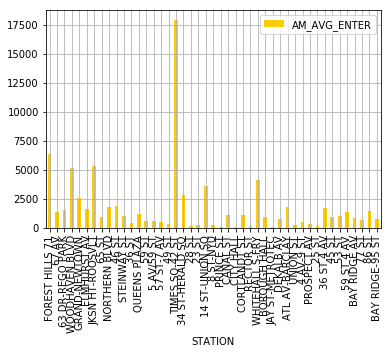

In [20]:
# graph R Train AM AVG ENTERS
plt = R_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FCCC0A')
plt.grid()

# save the fig
plt.figure.savefig('R-AM-enter.pdf')

In [21]:
# order stations in excel
# save as csv
R_commuters_order.to_csv('R_commuters_final.csv')

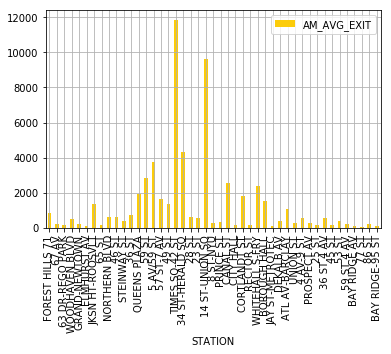

In [22]:
# graph R Train AM AVG EXITS
plt = R_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FCCC0A')
plt.grid()

# save the figa
plt.figure.savefig('R-AM-exit.pdf')